# Imports and Libraries

In [1]:
import pandas as pd
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticks
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
# find all csv file under Data/Chicago folder
path = 'Data/Chicago'
csv_files = glob.glob(path + "/*.csv")
csv_files.sort()
print(csv_files)

['Data/Chicago\\Chicago-Crime_2001.csv', 'Data/Chicago\\Chicago-Crime_2002.csv', 'Data/Chicago\\Chicago-Crime_2003.csv', 'Data/Chicago\\Chicago-Crime_2004.csv', 'Data/Chicago\\Chicago-Crime_2005.csv', 'Data/Chicago\\Chicago-Crime_2006.csv', 'Data/Chicago\\Chicago-Crime_2007.csv', 'Data/Chicago\\Chicago-Crime_2008.csv', 'Data/Chicago\\Chicago-Crime_2009.csv', 'Data/Chicago\\Chicago-Crime_2010.csv', 'Data/Chicago\\Chicago-Crime_2011.csv', 'Data/Chicago\\Chicago-Crime_2012.csv', 'Data/Chicago\\Chicago-Crime_2013.csv', 'Data/Chicago\\Chicago-Crime_2014.csv', 'Data/Chicago\\Chicago-Crime_2015.csv', 'Data/Chicago\\Chicago-Crime_2016.csv', 'Data/Chicago\\Chicago-Crime_2017.csv', 'Data/Chicago\\Chicago-Crime_2018.csv', 'Data/Chicago\\Chicago-Crime_2019.csv', 'Data/Chicago\\Chicago-Crime_2020.csv', 'Data/Chicago\\Chicago-Crime_2021.csv', 'Data/Chicago\\Chicago-Crime_2022.csv', 'Data/Chicago\\Chicago-Crime_2023.csv']


In [3]:
# read and merge all csv_files
df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)
display(df.head(),df.tail())

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.00,NaN,41.81,-87.69
1,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
2,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56
3,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68
4,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.00,NaN,42.00,-87.69


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
7839817,13129637,07/05/2023 12:55:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1512,15.00,29.00,41.88,-87.77
7839818,13129733,07/05/2023 12:56:00 AM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,935,9.00,20.00,41.80,-87.64
7839819,13130905,07/05/2023 12:57:00 PM,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1731,17.00,45.00,41.95,-87.75
7839820,13135945,07/05/2023 12:57:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2511,25.00,30.00,41.94,-87.78
7839821,13130603,07/05/2023 12:58:00 AM,BATTERY,SIMPLE,PARK PROPERTY,False,False,1712,17.00,39.00,41.97,-87.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7839822 entries, 0 to 7839821
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 613.1+ MB


# Create two forms of data

In [5]:
# Original format: convert Date to datetime dtype
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = False,
                           format = '%m/%d/%Y %H:%M:%S %p')

In [6]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311358,2001-01-01 01:00:00,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.00,NaN,41.81,-87.69
1,6154338,2001-01-01 01:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
2,1311269,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56
3,1311226,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68
4,1311144,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.00,NaN,42.00,-87.69


In [7]:
# set the datetime column as the index
df = df.set_index('Date')
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1311358,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.00,NaN,41.81,-87.69
2001-01-01 01:00:00,6154338,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
2001-01-01 01:00:00,1311269,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56
2001-01-01 01:00:00,1311226,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68
2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.00,NaN,42.00,-87.69


In [8]:
df['District'].value_counts()

8.00     526626
11.00    502904
6.00     458478
7.00     452787
25.00    445861
4.00     445093
3.00     397569
12.00    388891
9.00     382888
2.00     371365
19.00    352333
18.00    351914
5.00     347228
10.00    337816
15.00    335611
1.00     317532
14.00    303162
16.00    262559
22.00    256905
24.00    237027
17.00    226252
20.00    138725
31.00       245
21.00         4
Name: District, dtype: int64

In [9]:
# A resampled/converted crime counts version 
# alternate code:
resampled_df = df.copy()
# add 'Count' column with 1 for each row
resampled_df['Count'] = 1
# resample and count with .sum()
resampled_df = resampled_df.resample('D').sum(numeric_only = True)

# check
resampled_df.head()

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,,,
2001-01-01,4011740634,400,289,2267987,"21,147.00","8,194.00","72,641.08","-152,199.72",1825
2001-01-02,1545846568,383,146,1404493,"12,797.00",147.00,"47,664.67","-99,856.85",1143
2001-01-03,1542074517,343,162,1462886,"13,359.00",132.00,"48,045.81","-100,651.35",1151
2001-01-04,1555657957,377,131,1397040,"12,994.00",0.00,"48,785.52","-102,222.92",1166
2001-01-05,1701884634,415,159,1530155,"14,044.00",156.00,"52,769.46","-110,554.59",1267


# Comparing Police Districts:

Which district has the most crimes? Which has the least?

In [10]:
# create a barplot function
def plot_bar(df, y_column, pale, yticks, ylab):
  fig, axes = plt.subplots(nrows=1, figsize=(15,5), sharex=True)
  g = sns.countplot(data=df, y=y_column, 
              palette=pale, order = df[y_column].value_counts().index)
  g.set(yticklabels=yticks);
  g.set_xlabel('Counts');
  g.set_ylabel(ylab);
  g.set_title(f'Count of Each {ylab}', fontsize=14, weight = 'bold');

  total = float(len(df))
  for p in g.patches:
      count = round(p.get_width())
      y = p.get_y() + p.get_height()-0.3
      x = p.get_width()
      g.annotate(count, (x, y),ha='left')
        
  FOLDER = "PNG/"
  isExist = os.path.exists(FOLDER)
    
  if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
  plt.savefig(f'{FOLDER}/{y_column}_barplot.png',bbox_inches='tight')

  return fig,g


In [11]:
# number of crimes per district
count_by_dis = df['District'].value_counts().rename_axis('District').to_frame('Count')
count_by_dis = count_by_dis.reset_index()
display(count_by_dis.head(1),count_by_dis.tail(1))

,District,Count
0,8.00,526626


,District,Count
23,21.00,4


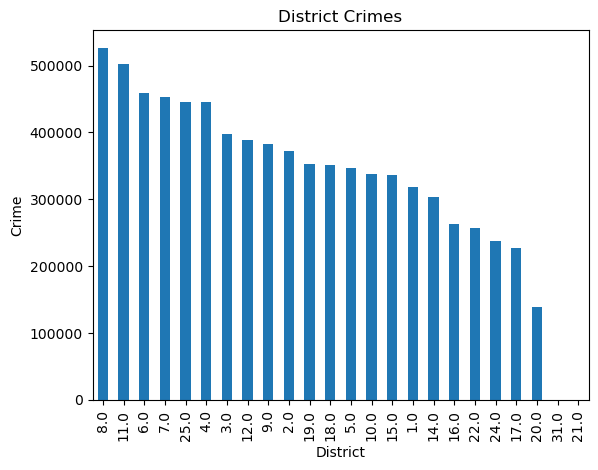

In [12]:
District = df['District'].value_counts()

ax = District.plot(kind = 'bar', title = 'District Crimes',)
ax.set (xlabel = 'District', ylabel = 'Crime')

plt.savefig('District_Crime.png')

# Results: 

The district with the most crimes is District 11 with 73, 001 crimes committed.  The district with the least amount of crimes committed is District 31 with 31 crimes.

#  Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [13]:
df['year'] = df.index.year
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1311358,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.00,NaN,41.81,-87.69,2001
2001-01-01 01:00:00,6154338,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70,2001
2001-01-01 01:00:00,1311269,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001
2001-01-01 01:00:00,1311226,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68,2001
2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.00,NaN,42.00,-87.69,2001


In [14]:
yearly_crime = df.resample('Y').size()

yearly_crime

Date
2001-12-31    485885
2002-12-31    486804
2003-12-31    475983
2004-12-31    469421
2005-12-31    453772
2006-12-31    448177
2007-12-31    437087
2008-12-31    427169
2009-12-31    392824
2010-12-31    370503
2011-12-31    351973
2012-12-31    336272
2013-12-31    307475
2014-12-31    275742
2015-12-31    264774
2016-12-31    269806
2017-12-31    269093
2018-12-31    268806
2019-12-31    261288
2020-12-31    212165
2021-12-31    208708
2022-12-31    238677
2023-12-31    127418
Freq: A-DEC, dtype: int64

# Visualization

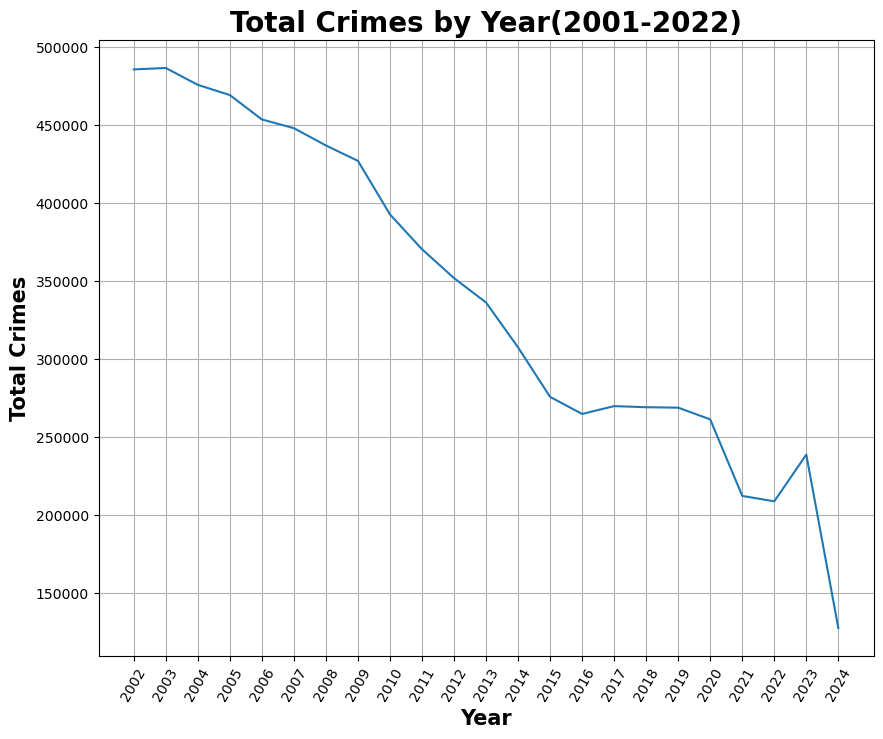

In [15]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.lineplot(x = yearly_crime.index, y = yearly_crime.values)


major_ticks_loc = mdates.YearLocator(1)
major_ticks_format = mdates.DateFormatter('%Y')
x_years = pd.date_range(start = '2002', end = '2024', freq = 'AS')
plt.xticks(x_years, [year.year for year in x_years])

plt.xticks(rotation = 60)
ax.grid()

ax.set_title('Total Crimes by Year(2001-2022)', fontsize = 20, weight = 'bold')
ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
ax.set_xlabel('Year', fontsize = 15, weight = 'bold');

In [16]:
df = df.rename(columns = {'Primary Type':'Primary_Type'})

In [17]:
df['Primary_Type'].value_counts()

THEFT                                1653995
BATTERY                              1432621
CRIMINAL DAMAGE                       893660
NARCOTICS                             748633
ASSAULT                               512188
OTHER OFFENSE                         486807
BURGLARY                              425918
MOTOR VEHICLE THEFT                   381494
DECEPTIVE PRACTICE                    348670
ROBBERY                               294289
CRIMINAL TRESPASS                     215240
WEAPONS VIOLATION                     108408
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56175
PUBLIC PEACE VIOLATION                 52521
SEX OFFENSE                            30978
CRIM SEXUAL ASSAULT                    27607
INTERFERENCE WITH PUBLIC OFFICER       18498
LIQUOR LAW VIOLATION                   14948
GAMBLING                               14620
ARSON                                  13370
HOMICIDE                               12710
KIDNAPPING

In [18]:
df.replace({'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT'}, inplace = True)

In [19]:
df.replace({'NON - CRIMINAL':'NON-CRIMINAL (SUBJECT SPECIFIED)'}, inplace = True)

In [20]:
df.replace({'NON-CRIMINAL (SUBJECT SPECIFIED)':'NON-CRIMINAL'}, inplace = True)

In [21]:
df.replace({'OTHER NARCOTIC VIOLATION':'NARCOTICS'}, inplace = True)

In [22]:
df['Primary_Type'].value_counts()

THEFT                                1653995
BATTERY                              1432621
CRIMINAL DAMAGE                       893660
NARCOTICS                             748782
ASSAULT                               512188
OTHER OFFENSE                         486807
BURGLARY                              425918
MOTOR VEHICLE THEFT                   381494
DECEPTIVE PRACTICE                    348670
ROBBERY                               294289
CRIMINAL TRESPASS                     215240
WEAPONS VIOLATION                     108408
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56175
PUBLIC PEACE VIOLATION                 52521
CRIMINAL SEXUAL ASSAULT                34692
SEX OFFENSE                            30978
INTERFERENCE WITH PUBLIC OFFICER       18498
LIQUOR LAW VIOLATION                   14948
GAMBLING                               14620
ARSON                                  13370
HOMICIDE                               12710
KIDNAPPING

# Results:
The total number of crimes is decreasing over the years.



#  Comparing Months:

What months have the most crime? What months have the least?

In [23]:
df['month'] = df.index.month
df.head()

,ID,Primary_Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1311358,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.00,NaN,41.81,-87.69,2001,1
2001-01-01 01:00:00,6154338,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70,2001,1
2001-01-01 01:00:00,1311269,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.00,NaN,41.76,-87.56,2001,1
2001-01-01 01:00:00,1311226,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.00,NaN,41.95,-87.68,2001,1
2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.00,NaN,42.00,-87.69,2001,1


monthly_crime = df.resample('M').size()

monthly_crime

Text(0.5, 0, 'Months')

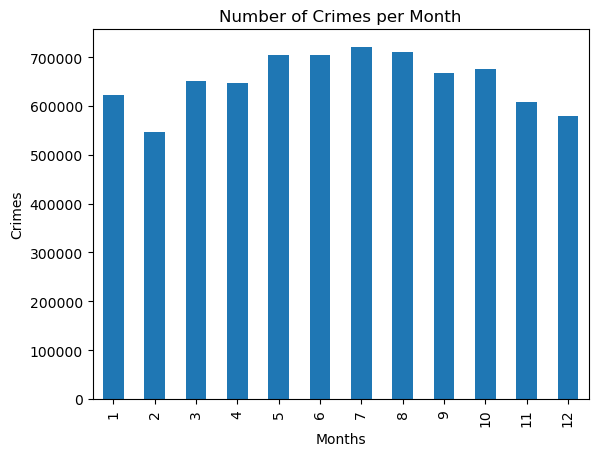

In [24]:
ax = df.groupby('month').count()['ID'].plot(kind = 'bar')

ax.set_title("Number of Crimes per Month")
ax.set_ylabel("Crimes")
ax.set_xlabel("Months")

# Results:

July has the most amount of crimes.  February had the least amount of crimes.